In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Para ajustar datos

In [2]:
def cargar_datos(path, file):
    data = np.loadtxt(path+file, delimiter=",")
    n_medicion, desplazamiento_fourier = data[:, 0], data[:, 1]
    return n_medicion, desplazamiento_fourier


In [44]:
path = ""
filename = "1GAP_500um_analisis_desplazamiento.dat"

x, y = cargar_datos(path="", file=filename)
# Cambiando a mm
x /= 1000

delta_x = x - x[0]

delta_y = y - y[0]

# x contiene el desplazamiento de la monturaa en um
# y contiene la posicion del maximo en el espacio de fourier

print("Max x:%.4f \nMin x: %.4f" % (delta_x.max(), delta_x.min()))


Max x:9.5000 
Min x: 0.0000


In [47]:
# Realizando ajuste

# Definicion del modelo a ajustar
def f(x, a, b):
    y = a*x+b
    return y


# Estimaciones iniciales de los parametros del modelo
p0 = [0.9, 0]
# Ajustando
pars, cov = curve_fit(
    f=f, xdata=delta_x[:], ydata=delta_y[:], p0=p0, bounds=(-np.inf, np.inf))

# Separando parametros
a, b = pars[:]

# Definiendo dominio de la funcion ajustada
x_fit = np.arange(0, 10, 0.5)
# Evaluando funcion ajustada
y_fit = f(x_fit, a, b)

# Calculando R-square
ss_res = np.sum((delta_y-f(delta_x, a, b))**2)
ss_tot = np.sum((delta_y-delta_y.mean())**2)
r_square = 1-ss_res/ss_tot
print(r_square)


0.9999660900906828


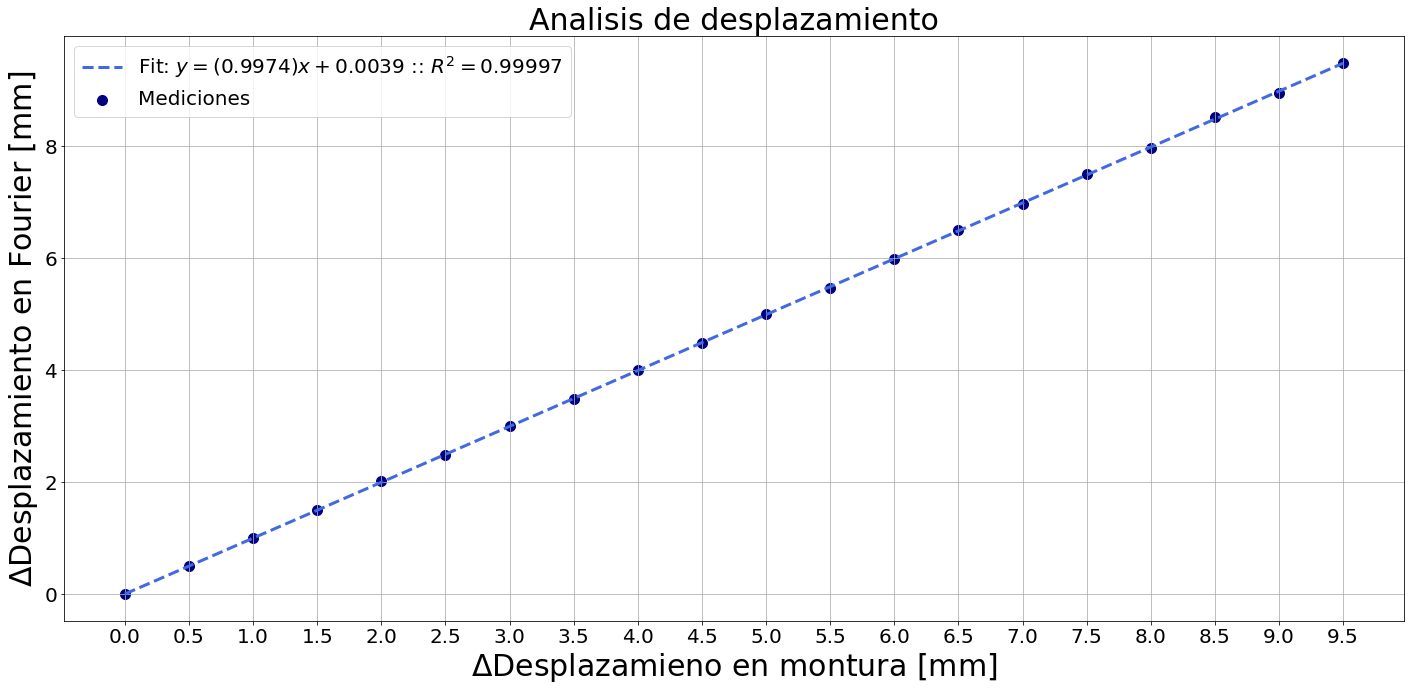

In [48]:

"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(20, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"Analisis de desplazamiento", fontsize=30)


graph_data = ax.scatter(delta_x[:], delta_y[:],
                        s=400, marker=".", c="navy", label="Mediciones")

# Decidiendo label fit:
if(b < 0):
    label_fit = r"Fit: $y = (%.4f)x %.4f$ :: $R^{2}= %.5f$" % (a, b, r_square)
else:
    label_fit = r"Fit: $y = (%.4f)x + %.4f$ :: $R^{2}= %.5f$" % (
        a, b, r_square)

graph_fit = ax.plot(x_fit, y_fit, c="royalblue", linestyle="dashed",
                    linewidth=3, label=label_fit)

ax.set_xlabel(r"$\Delta$Desplazamieno en montura [mm]", fontsize=30)
ax.set_ylabel("$\Delta$Desplazamiento en Fourier [mm]", fontsize=30)
ax.grid()
ax.set_xticks(np.arange(0, 10, 0.5))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=20)
#plt.savefig(path + filename[0:-4]+".png")
plt.savefig(path + "seguimiento_envolventes_normalizada_500um.png")
plt.show()


# Analizando grafica de las pendientes de todas las graficas 1GAP

In [70]:
path = ""
filename = "analisis_relacion_desplazamientos.dat"

x, y = cargar_datos(path="", file=filename)

# x contiene el valor estimado de desplazamiento
# y contiene el valor de la pendiente del ajuste lineal asociado con esa grafica


In [71]:
# Realizando ajuste

# Definicion del modelo a ajustar
def f(x, a,b,c):
    y = a*np.exp(b*x)+c
    return y


# Estimaciones iniciales de los parametros del modelo
p0 = [-1, -0.07, 0.2]
# Ajustando
pars, cov = curve_fit(
    f=f, xdata=x[:], ydata=y[:], p0=p0, bounds=(-np.inf, np.inf))

# Separando parametros
a, b, c = pars[:]

# Definiendo dominio de la funcion ajustada
x_fit = np.arange(0, 500, 1)
# Evaluando funcion ajustada
y_fit = f(x_fit, a, b, c)

# Calculando R-square
#ss_res = np.sum((delta_y-f(delta_x,a,b))**2)
#ss_tot = np.sum((delta_y-delta_y.mean())**2)
#r_square= 1-ss_res/ss_tot
#print(r_square)


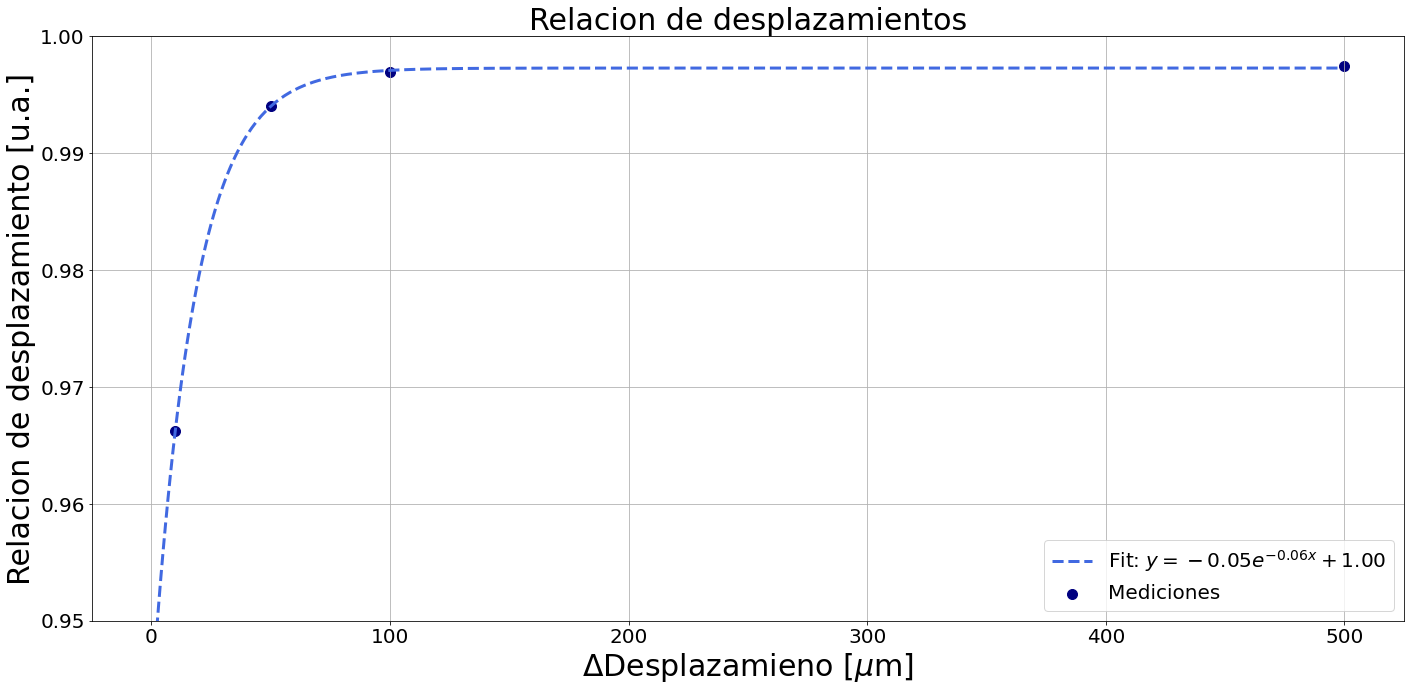

In [73]:

"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(20, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"Relacion de desplazamientos", fontsize=30)


graph_data = ax.scatter(x[:], y[:], s=400, marker=".",
                        c="navy", label="Mediciones")

# Decidiendo label fit:
# Decidiendo label fit:
if(c < 0):
    label_fit = r"Fit: $y = %.2fe^{%.2fx} %.2f$" % (a,b,c)
else:
    label_fit = r"Fit: $y = %.2fe^{%.2fx} + %.2f$" % (a,b,c)
graph_fit = ax.plot(x_fit, y_fit, c="royalblue", linestyle="dashed",
 linewidth=3, label=label_fit)

ax.set_xlabel(r"$\Delta$Desplazamieno [$\mu$m]", fontsize=30)
ax.set_ylabel("Relacion de desplazamiento [u.a.]", fontsize=30)
ax.grid()
#ax.set_xticks(np.arange(0, 10, 0.5))
ax.set_ylim([0.95, 1])
ax.legend(loc="best", fontsize=20)
#plt.savefig(path + filename[0:-4]+".png")
plt.savefig(path + "analisis_relacion_desplazamientos.png")
plt.show()
